In [1]:
from importlib import reload
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nifty5
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import bayesian_causal_model.bayesian_causal_model
from benchmark_utils import get_pair
reload(bayesian_causal_model.bayesian_causal_model)
import bayesian_causal_model.bayesian_causal_sampling_numpy

/afs/mpa/data/maxk/miniconda3/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/afs/mpa/data/maxk/miniconda3/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/afs/mpa/data/maxk/miniconda3/envs/causality/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## show benchmark datasets

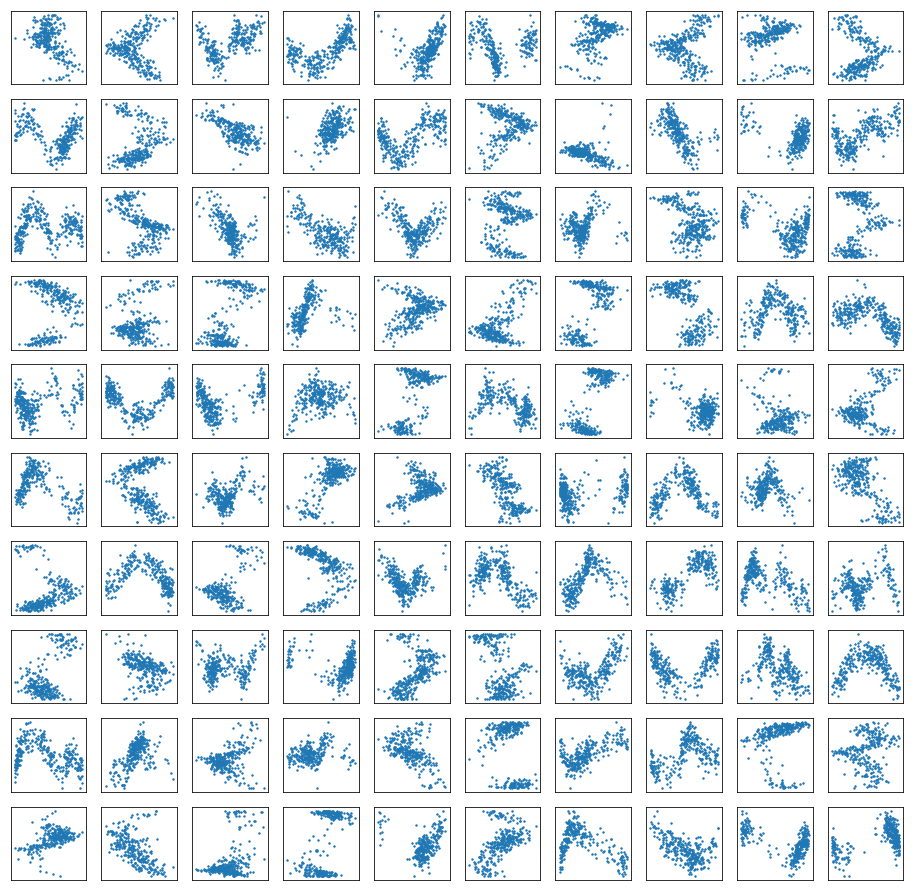

In [3]:
fig = plt.figure(figsize=(16,16))
subplots = fig.subplots(10, 10)
for i in range(100):
    ax = subplots[i//10, i%10]
    x, y = get_pair(i , 'bcs_nvar5e-2')[0]
    ax.scatter(x, y, s=2)
    ax.tick_params(
        axis='both',
        which='both', 
        bottom=False,   
        top=False,    
        left=False,
        right=False,
        # ticks along the top edge are off
        labelbottom=False,
        labelleft=False)
    

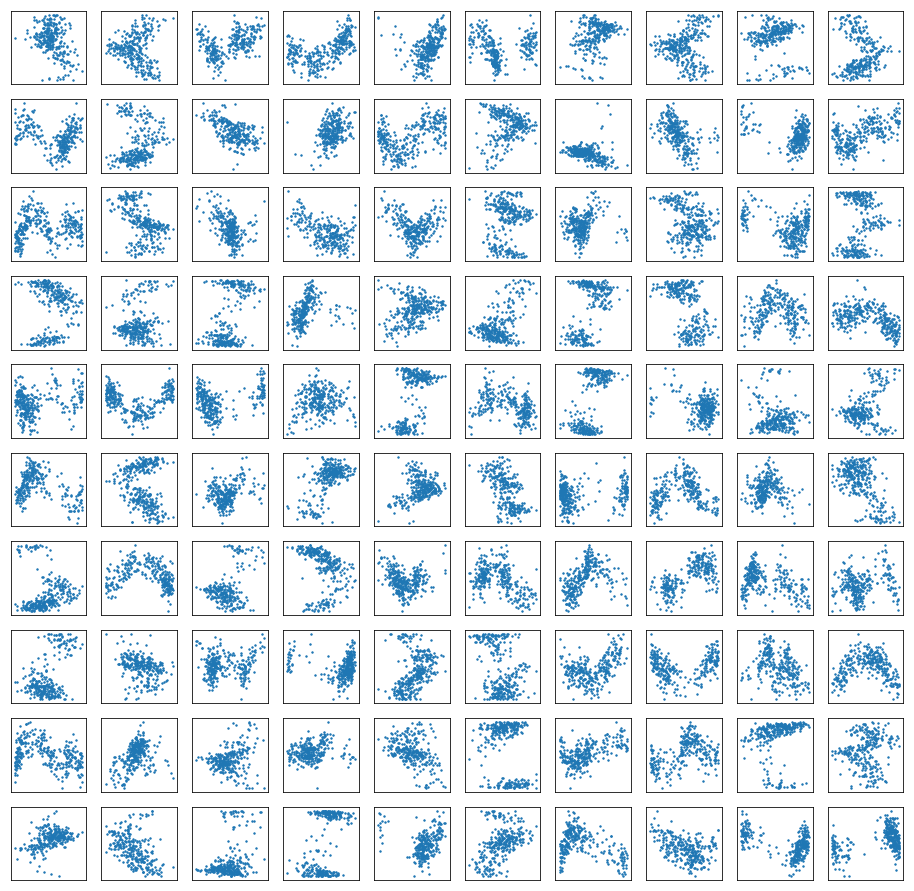

In [4]:
fig = plt.figure(figsize=(16,16))
subplots = fig.subplots(10, 10)
for i in range(100):
    ax = subplots[i//10, i%10]
    x, y = get_pair(i , 'bcs_nvar1e-1')[0]
    ax.scatter(x, y, s=2)
    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,    
        left=False,
        right=False,
        # ticks along the top edge are off
        labelbottom=False,
        labelleft=False)
    

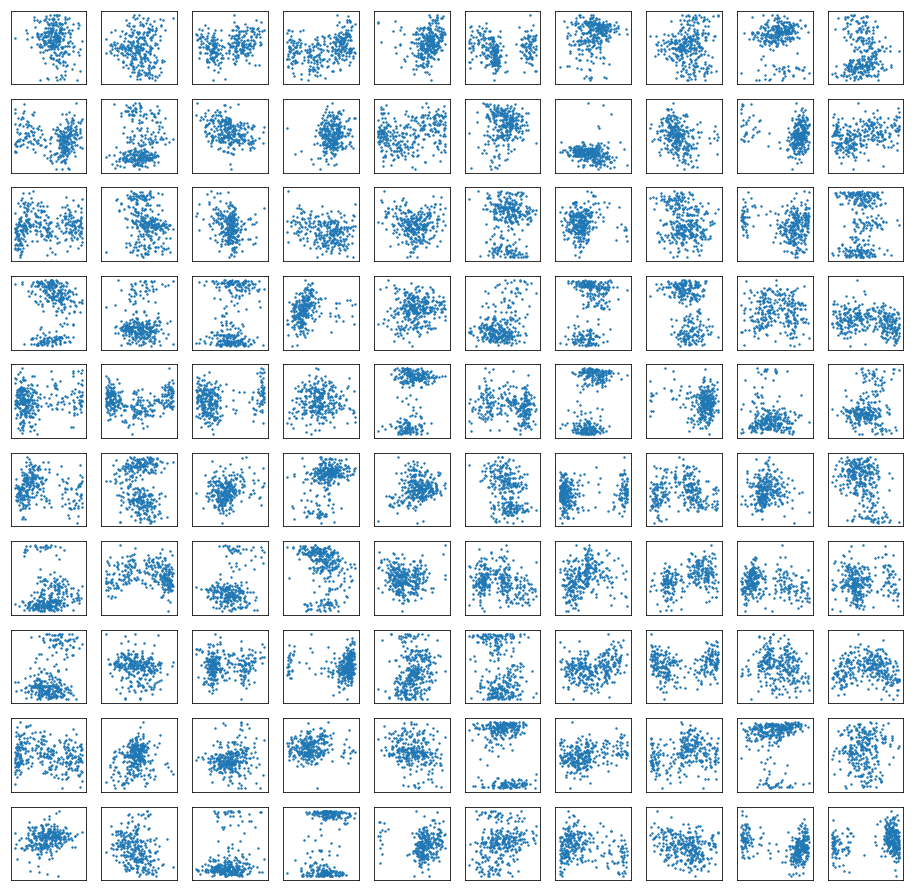

In [5]:
fig = plt.figure(figsize=(16,16))
subplots = fig.subplots(10, 10)
for i in range(100):
    ax = subplots[i//10, i%10]
    x, y = get_pair(i , 'bcs_nvar5e-1')[0]
    ax.scatter(x, y, s=2)
    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,    
        left=False,
        right=False,
        # ticks along the top edge are off
        labelbottom=False,
        labelleft=False)

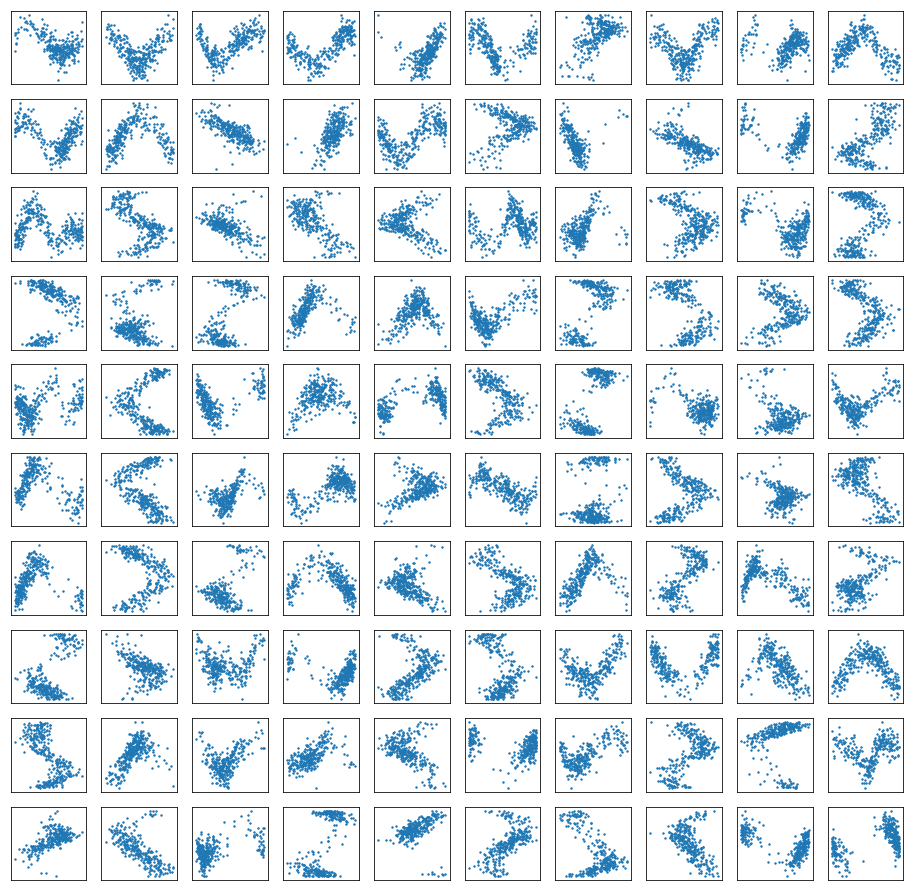

In [2]:
fig = plt.figure(figsize=(16,16))
subplots = fig.subplots(10, 10)
for i in range(100):
    ax = subplots[i//10, i%10]
    x, y = get_pair(i , 'bcs_power6_nvar5e-2')[0]
    ax.scatter(x, y, s=2)
    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,    
        left=False,
        right=False,
        # ticks along the top edge are off
        labelbottom=False,
        labelleft=False)

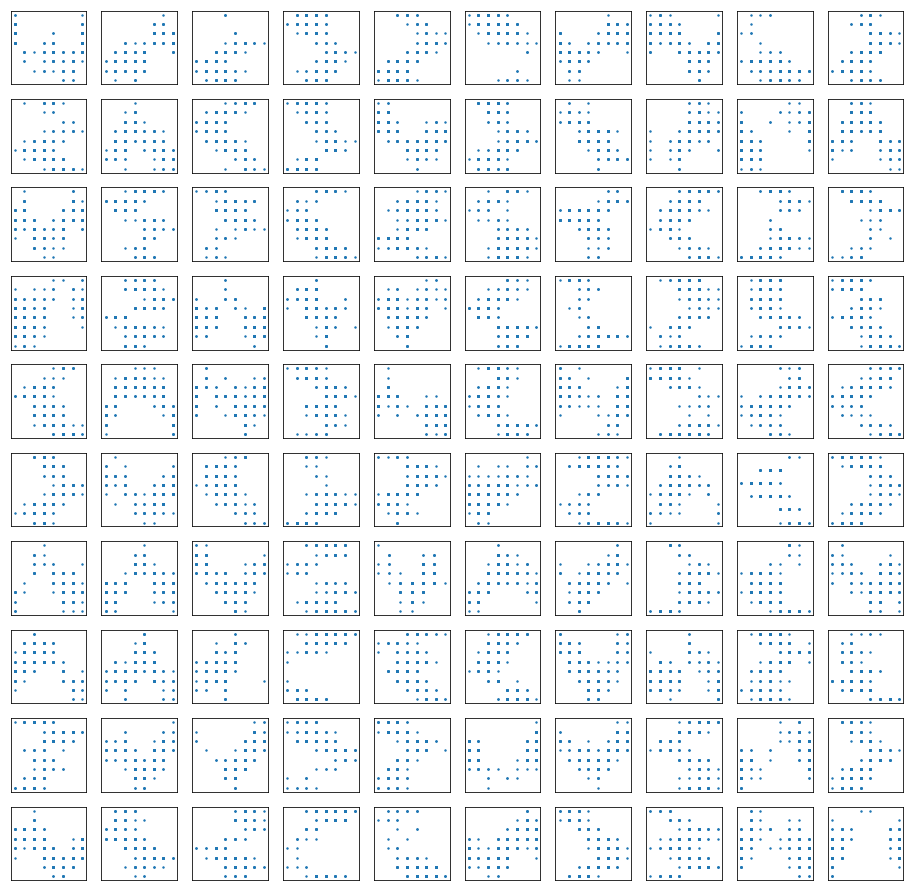

In [3]:
fig = plt.figure(figsize=(16,16))
subplots = fig.subplots(10, 10)
for i in range(100):
    ax = subplots[i//10, i%10]
    x, y = get_pair(i , 'bcs_8bins')[0]
    ax.scatter(x, y, s=2)
    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,    
        left=False,
        right=False,
        # ticks along the top edge are off
        labelbottom=False,
        labelleft=False)
    

# Examples for the Forward Model

### pspec 1/(q**4+1)

In [23]:
reload(bayesian_causal_model.bayesian_causal_sampling_numpy)

<module 'bayesian_causal_model.bayesian_causal_sampling_numpy' from '../bayesian_causal_model/bayesian_causal_sampling_numpy.py'>

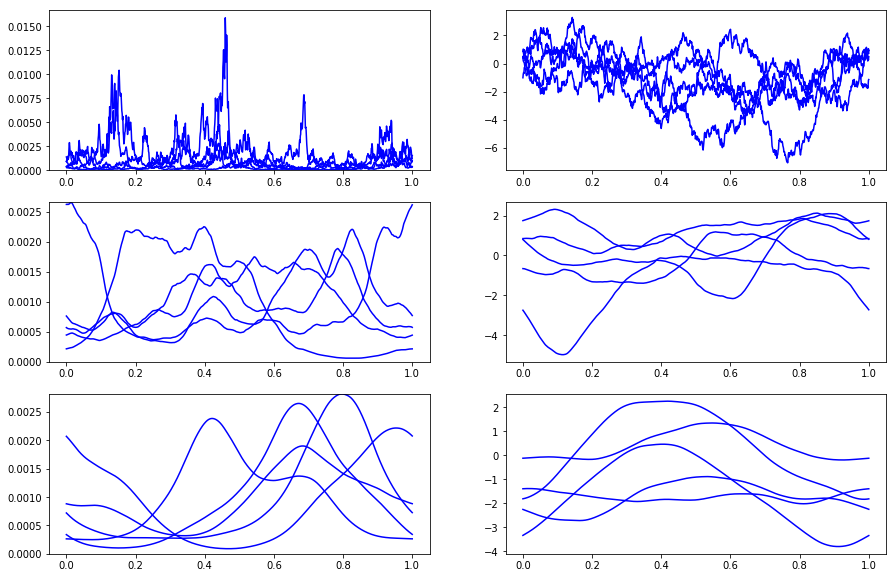

In [46]:
bcs = bayesian_causal_model.bayesian_causal_sampling_numpy.BayesianCausalSampler(
    power_spectrum_beta=lambda q: 1e3/((q)**2 + 1),
    power_spectrum_f=lambda q: 1e3/((q)**2 + 1),
    noise_var=5e-2)

x = np.linspace(0, 1, bcs.N_bins)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,10))

for i in range(5):
    bcs.draw_sample_fields()
    ax1.plot(x, bcs.p_x, c='blue')#label=r'$\mathcal{P}(x) \propto e^{\beta(x)}$')
    ax1.set_ylim(bottom=0, top=max(ax1.get_ylim()[1], max(bcs.p_x)))
    #ax1_2 = ax1.twinx()
    #ax1_2.plot(x, np.array(bcs.beta), c='orange', label=r'$\beta(x)$')
    #ax1_2.legend(loc=1)
    ax2.plot(x, bcs.f,c='blue')#label='f(x)')
    #ax2.set_ylim(bottom=0, top=max(ax2.get_ylim()[1], max(bcs.p_x)))
    #ax2.legend()
    
bcs = bayesian_causal_model.bayesian_causal_sampling_numpy.BayesianCausalSampler(
    power_spectrum_beta=lambda q: 1e3/((q)**4 + 1),
    power_spectrum_f=lambda q: 1e3/((q)**4 + 1),
    noise_var=5e-2)

for i in range(5):
    bcs.draw_sample_fields()
    ax3.plot(x, bcs.p_x, c='blue')#label=r'$\mathcal{P}(x) \propto e^{\beta(x)}$')
    ax3.set_ylim(bottom=0, top=max(ax3.get_ylim()[1], max(bcs.p_x)))
    #ax1_2 = ax1.twinx()
    #ax1_2.plot(x, np.array(bcs.beta), c='orange', label=r'$\beta(x)$')
    #ax1_2.legend(loc=1)
    ax4.plot(x, bcs.f,c='blue')#label='f(x)')
    #ax4.set_ylim(bottom=0, top=max(ax4.get_ylim()[1], max(bcs.p_x)))
    #ax2.legend()

bcs = bayesian_causal_model.bayesian_causal_sampling_numpy.BayesianCausalSampler(
    power_spectrum_beta=lambda q: 1e3/((q)**6 + 1),
    power_spectrum_f=lambda q: 1e3/((q)**6 + 1),
    noise_var=5e-2)

for i in range(5):
    bcs.draw_sample_fields()
    ax5.plot(x, bcs.p_x, c='blue')#label=r'$\mathcal{P}(x) \propto e^{\beta(x)}$')
    ax5.set_ylim(bottom=0, top=max(ax5.get_ylim()[1], max(bcs.p_x)))
    #ax1_2 = ax1.twinx()
    #ax1_2.plot(x, np.array(bcs.beta), c='orange', label=r'$\beta(x)$')
    #ax1_2.legend(loc=1)
    ax6.plot(x, bcs.f,c='blue')#label='f(x)')
    #ax6.set_ylim(bottom=0, top=max(ax6.get_ylim()[1], max(bcs.p_x)))
    #ax2.legend()

No handles with labels found to put in legend.


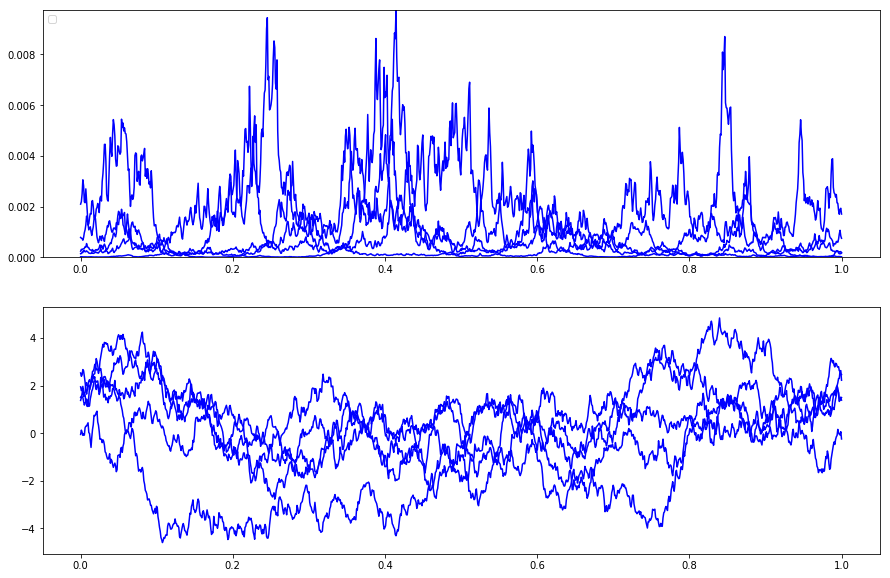

In [38]:
bcs = bayesian_causal_model.bayesian_causal_sampling_numpy.BayesianCausalSampler(
    power_spectrum_beta=lambda q: 1e3/((q)**2 + 1),
    power_spectrum_f=lambda q: 1e3/((q)**2 + 1),
    noise_var=5e-2)

x = np.linspace(0, 1, bcs.N_bins)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.legend(loc=2)

for i in range(5):
    bcs.draw_sample_fields()
    ax1.plot(x, bcs.p_x, c='blue')#label=r'$\mathcal{P}(x) \propto e^{\beta(x)}$')
    ax1.set_ylim(bottom=0, top=max(ax1.get_ylim()[1], max(bcs.p_x)))
    #ax1_2 = ax1.twinx()
    #ax1_2.plot(x, np.array(bcs.beta), c='orange', label=r'$\beta(x)$')
    #ax1_2.legend(loc=1)
    ax2.plot(x, bcs.f,c='blue')#label='f(x)')
    #ax2.legend()

No handles with labels found to put in legend.


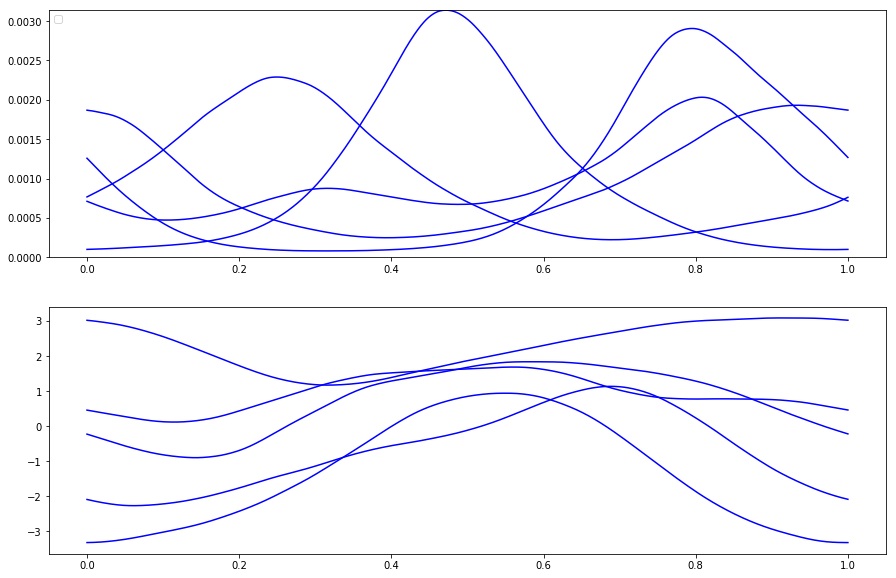

In [39]:
bcs = bayesian_causal_model.bayesian_causal_sampling_numpy.BayesianCausalSampler(
    power_spectrum_beta=lambda q: 1e3/((q)**6 + 1),
    power_spectrum_f=lambda q: 1e3/((q)**6 + 1),
    noise_var=5e-2)

x = np.linspace(0, 1, bcs.N_bins)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.legend(loc=2)

for i in range(5):
    bcs.draw_sample_fields()
    ax1.plot(x, bcs.p_x, c='blue')#label=r'$\mathcal{P}(x) \propto e^{\beta(x)}$')
    ax1.set_ylim(bottom=0, top=max(ax1.get_ylim()[1], max(bcs.p_x)))
    #ax1_2 = ax1.twinx()
    #ax1_2.plot(x, np.array(bcs.beta), c='orange', label=r'$\beta(x)$')
    #ax1_2.legend(loc=1)
    ax2.plot(x, bcs.f,c='blue')#label='f(x)')
    #ax2.legend()